## DATA620 - Week 8 ##

**1. Choose a corpus of interest.**

In [2]:
import nltk
from nltk.book import text6
text6

<Text: Monty Python and the Holy Grail>

**2. How many total unique words are in the corpus?**

In [3]:
len(text6)

16967

In [4]:
sorted(set(text6))
len(set(text6))

2166

In [5]:
from __future__ import division
round(len(text6) / len(set(text6)), 2) # lexical richness

7.83

Analysis would be more accurate with punctuation, numbers, and stopwords were excluded from the corpus.

In [6]:
import re
import string
from nltk.corpus import stopwords

numbers = ['1','2','3','4','5','6','7','8','9', '...', '--', '[', ']']

mp = " ".join([word.lower() for word in text6 if word not in string.punctuation and 
               word.lower() not in stopwords.words('english') and
              word.lower().isalpha()])

mp = nltk.word_tokenize(mp) # re-tokenize to restore nltk function compatibility

In [7]:
len(mp)

6882

In [8]:
len(set(mp))

1688

In [9]:
round(len(mp) / len(set(mp)), 2)

4.08

**3. Taking the most common words, how many unique words represent half of the total words in the corpus?**
  
Frequency distribution of the unique words in the corpus:

In [11]:
fd = nltk.FreqDist(mp)
fd = fd.most_common()
fd[:10]

[(u'arthur', 261),
 (u'oh', 112),
 (u'launcelot', 101),
 (u'knight', 84),
 (u'galahad', 80),
 (u'father', 75),
 (u'sir', 72),
 (u'ni', 69),
 (u'bedevere', 67),
 (u'knights', 65)]

Define the halfway threshold

In [12]:
t = 0.5 * len((mp))
print t

3441.0


To find the 50% mark, I converted the sorted distribution to a numpy array and used the cumulative sum function to form a new array. Then I searched the cumsum array to find the index where the cumulative sum hits the threshold. 

In [13]:
import numpy as np
mpa = np.array([x[1] for x in fd]) # convert freq count into array
mpa_cs = np.cumsum(mpa) # make cumsum array based on freq counts

idx = (np.abs(mpa_cs - t)).argmin() + 1 # add 1 to include the index containing the threshold value
print(idx)

102


In [14]:
mpa_cs[idx]

3450

The index value is the count of unique words in the top 50% of the corpus. There are 102 unique words in the top 50%, which is about 102/1688 = 6% of all unique words.

**4. Identify the 200 highest frequency words in this corpus.**

In [15]:
top200 = [w for [w,v] in fd[:200]]
print ', '.join(top200)

arthur, oh, launcelot, knight, galahad, father, sir, ni, bedevere, knights, well, head, ha, robin, right, guard, yes, villager, boom, come, uh, re, witch, away, clop, grail, king, one, burn, black, french, m, tim, us, look, singing, dead, get, mumble, scene, music, go, squeak, herbert, tell, got, hello, holy, camelot, dennis, castle, must, man, soldier, shall, zoot, brave, going, heh, run, stop, ve, three, say, old, concorde, think, see, ll, guests, master, please, bridgekeeper, could, god, crowd, name, saw, clang, cartoon, hee, narrator, know, dingo, good, back, um, let, shut, like, make, yeah, maynard, clap, bring, shh, thank, cart, woman, questions, stops, want, shrubbery, officer, quest, customer, minstrel, lord, sorry, girls, left, character, o, didn, sure, person, d, room, mean, seek, much, leave, round, may, take, time, find, liege, land, britons, death, ohh, guards, guest, thou, cut, bit, rewr, iesu, swallow, domine, pie, hold, peril, said, haw, eh, quite, quiet, middle, table,

**5. Create a graph that shows the relative frequency of these 200 words.**

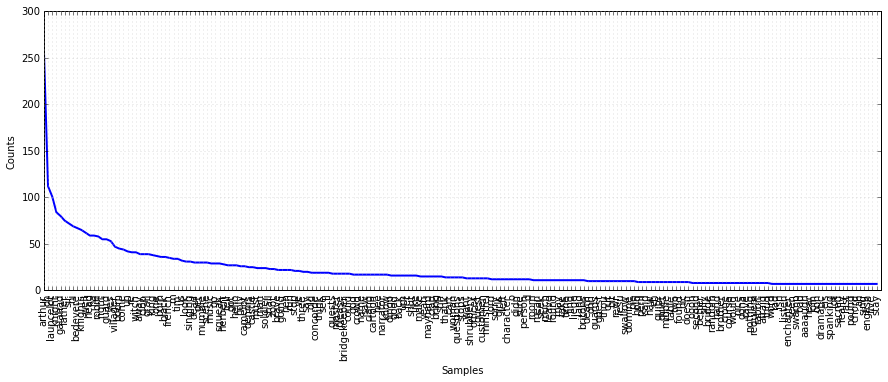

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt

fd = nltk.FreqDist(mp)
plt.figure(figsize=(15,5))
fd.plot(200)

Let's shorten it to 50 and also look at a cumulative frequency plot.

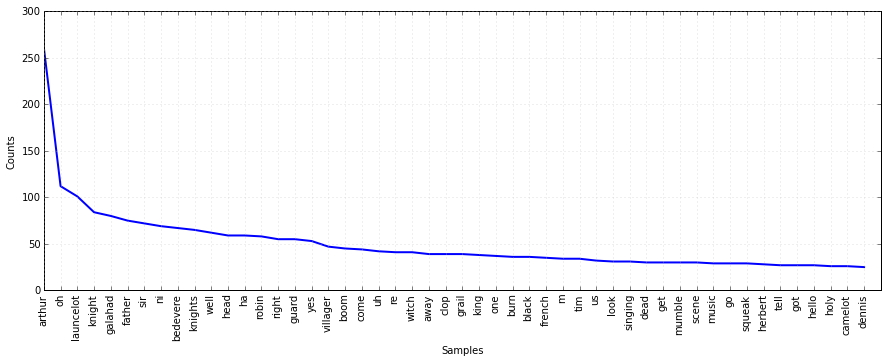

In [17]:
plt.figure(figsize=(15,5))
fd.plot(50)

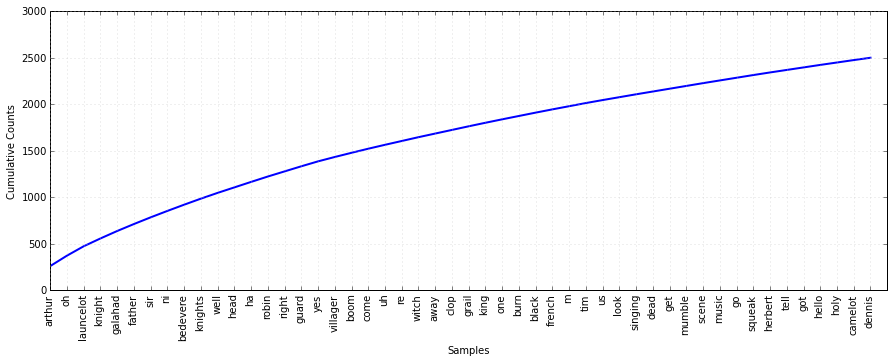

In [18]:
plt.figure(figsize=(15,5))
fd.plot(50, cumulative=True)

**6. Does the observed relative frequency of these words follow Zipf’s law? Explain.**

In [19]:
# separate top 200
fd = nltk.FreqDist(mp)
fd200 = fd.most_common()[:200]

# compute rel freq as ratio of most popular word 
maxfreq = fd200[0][1]
fd200rf = [y[1]/maxfreq * 200 for y in fd200]

Normal scale

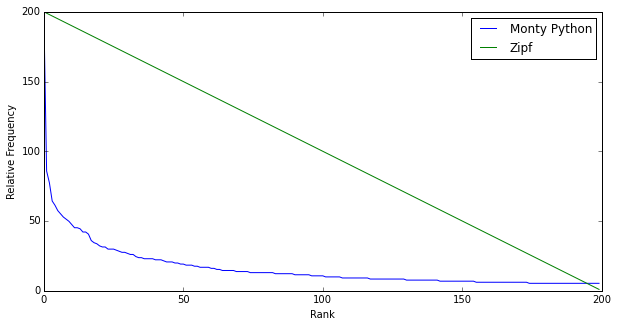

In [20]:
x = range(1, len(fd200rf)+1)
y = fd200rf
zipf = list(reversed(x))
plt.figure(figsize=(10,5))
plt.axis([0,200,0,200])
plt.plot(y)
plt.plot(zipf)
plt.xlabel("Rank")
plt.ylabel("Relative Frequency")
plt.legend(['Monty Python', 'Zipf'], loc='best')

Log scale

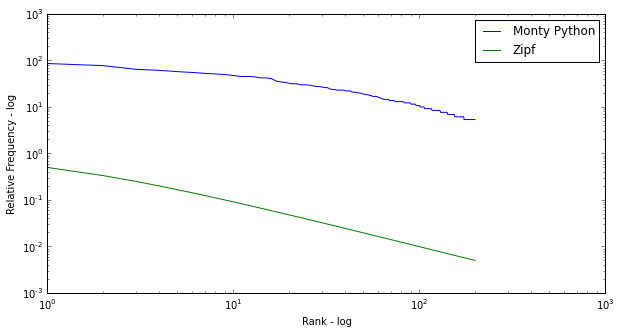

In [21]:
x = range(1, len(fd200rf)+1)
y = fd200rf
zipf = [1/n for n in x]

plt.figure(figsize=(10,5))
ax = plt.subplot(1,1,1)
ax.set_xscale('log')
ax.set_yscale('log')
ax.plot(y)
ax.plot(zipf)
ax.set_xlabel("Rank - log")
ax.set_ylabel("Relative Frequency - log")
ax.legend(['Monty Python', 'Zipf'], loc='best')

When plotting on the log scale, it looks like the top 200 words in the corpus follow Zipf's law as the lines are close to parallel.

**7. In what ways do you think the frequency of the words in this corpus differ from “all words in all corpora.”**

The word distribution is probably genre-specific, thus the word frequency in a medieval Monty Python comedy would certainly differ from your average modern comedy (or other type of) screenplay.